## &#128205; Basic Setups

In [40]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [4]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

'/Users/gogomovy/Desktop/GrowthHackers/교육세션 자료/Session 03. 데이터 시각화'

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [5]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [6]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [7]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [8]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [9]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [10]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [11]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [12]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [13]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. QUEST

### 3.1 

연령대(ex.10,20,30,40대) 변수와 함께 어떤 변수와의 관계를 보면 좋을지 기대 가설을 세우고, 적절한 방식으로 시각화 후 해석 보태 주세요.
연령은 25세, 26세~ 아닌 20대의 BIN 형태 연령대 (범주형 변수)로 묶어주세요.

[참고](https://nittaku.tistory.com/124)

In [27]:
# 연령대로 나누기 위한 column 추가해보자. 'age' column에는 이제 0, 10, 20... 이런 정보가 있음.
df['age']=(2019-df.birth_year)-(2019-df.birth_year)%10

In [22]:
# trip_duration이 second 단위이므로 min으로 바꾸어보자.
df['trip_duration_min']=df['trip_duration']/60

In [24]:
# 통계량 파악
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

In [25]:
# 이상치 제거
# 이 경우 이미 교육세션에서 찾았던 이상치여서 제거하였습니다.
cut_point = df["trip_duration_min"].quantile(0.99) # 상위 99% 값을 cut_point로 지정. 즉 상위 1%의 값이 기준점이 됨.
df_cut=df[df['trip_duration_min'] < cut_point]

In [34]:
df_cut['age'].value_counts().sort_values()

120        2
100        7
90         7
130       13
80        32
110       46
10       201
70       639
60      4070
20     13360
40     13871
50     16381
30     22685
Name: age, dtype: int64

<Figure size 720x360 with 0 Axes>

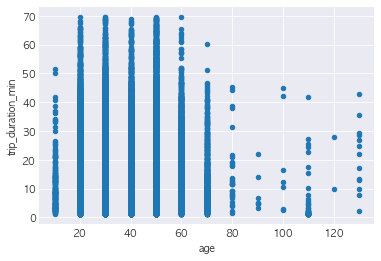

In [36]:
# 연령대 순(x축에 따라) 정렬
plt.figure(figsize=(10,5))
df_cut.plot.scatter(x='age',y='trip_duration_min')
plt.show()

**해석 보태기**
>연령대 변수와 대여시간 변수 간의 관계를 보고 싶었습니다.
시각화 툴은 히스토그램이 가장 적절할 것 같았습니다.
다만 산점도 방식의 히스토그램은 일정 수준 이상의 군집이 생기면 비교가 어렵다는 단점이 있었습니다.(20,50대 간 비교가 지금 거의 불가능한 상황)
그럼에도 불구하고 몇가지 결론을 도출해보면 대다수의 이용자가 20,50대에 형성되고 있다는 것, 그리고 그들의 평균적인 이용 시간이 높다는 것을 육안으로도 쉽게 확인 가능합니다.
다만 100세 이상의 이용자가 실존하는 것인지, 출생연도가 잘못 입력된것인지 의문이었습니다.

### 3.2

Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. trip_duration은 평균(mean)이어도 좋고, 누적(sum)이어도 좋습니다. 해석 보태 주세요.
Groupby 함수 사용해주시면 편합니다.



In [37]:
# groupby를 이용해서 bike_id별로 묶어보자.
df_group = df_cut.groupby('bike_id')['trip_duration'].mean()

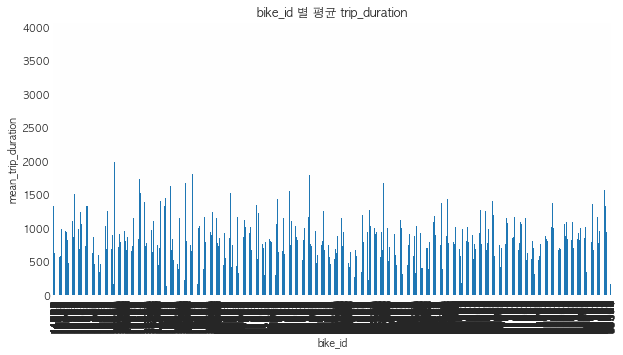

In [39]:
plt.figure(figsize=(10,5))
df_group.plot(kind='bar')
plt.xlabel('bike_id')
plt.ylabel('mean_trip_duration')
plt.title('bike_id 별 평균 trip_duration')
plt.show()

**해석 보태기**
>제가 문제를 잘못 이해해서 한 것인지는 몰라도, bike_id가 너무 많아서 분석이 오래걸렸던 것 같습니다.이것으로부터 어떤 유의미한 결과를 도출해내기는 힘들 것 같습니다만 순서대로 정렬한 이후에 노후한 자전거를 교체한다든지,, 하는데에 쓸 수 있을 것 같습니다.
혹은 상위 10~20개의 bike_id를 찾아서 그들만의 공통점을 찾는 식으로의 추후 분석이 가능할 것 같습니다.

### 3.3

Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 해석은 안 보태 주셔도 됩니다.

In [45]:
# 이용 횟수가 많은 상위 30개의 자전거를 남겨봄.
top_list=df_cut['bike_id'].value_counts().nlargest(10).index
df_top = df_cut[df_cut['bike_id'].isin(top_list)]

In [49]:
# 이용횟수가 상위 30위인 자전거에 대해, 대여 시작 시간 별 평균적인 이용시간을 알아보기로 함.
base = df_top.groupby(['bike_id','start_hour'])['trip_duration'].mean().unstack()
base

start_hour,0,4,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
bike_id,,,,,,,,,,,,,,,,,,,,,
25697,NaN,NaN,NaN,558.5,657.000000,451.000000,402.500000,969.0,NaN,508.333333,...,785.0,NaN,843.333333,501.500000,582.000000,917.250000,487.0,441.250000,708.00,NaN
30078,NaN,NaN,NaN,NaN,2419.000000,1036.500000,607.000000,1437.5,338.5,351.000000,...,NaN,309.333333,324.000000,NaN,1268.000000,1749.000000,1515.0,2450.000000,2656.00,1262.0
30259,NaN,NaN,NaN,303.0,490.000000,394.000000,525.000000,940.0,391.0,510.500000,...,958.5,750.000000,NaN,1139.500000,577.000000,1124.666667,553.0,NaN,NaN,NaN
30792,NaN,NaN,NaN,NaN,504.000000,341.666667,NaN,NaN,916.5,354.000000,...,1175.5,1025.000000,409.000000,815.666667,1923.000000,1195.500000,480.0,867.666667,1987.00,70.0
30998,NaN,NaN,NaN,NaN,NaN,1385.000000,NaN,682.0,1497.5,753.500000,...,1607.0,805.000000,1165.000000,730.000000,707.666667,762.500000,1910.0,552.500000,497.75,498.0
31210,NaN,NaN,NaN,NaN,203.500000,802.000000,NaN,1450.0,998.5,237.333333,...,1842.0,1278.500000,254.000000,384.500000,1380.000000,568.500000,768.0,NaN,2513.50,NaN
31382,NaN,301.0,475.0,1221.0,288.000000,1267.000000,NaN,NaN,1195.0,972.333333,...,622.0,511.000000,546.000000,NaN,476.000000,1426.500000,NaN,NaN,NaN,NaN
32203,NaN,NaN,NaN,NaN,980.500000,366.666667,1195.000000,178.5,559.0,550.333333,...,NaN,NaN,477.666667,808.000000,438.200000,NaN,NaN,NaN,563.00,NaN
32429,864.0,NaN,391.0,286.0,671.666667,984.500000,777.333333,651.5,1612.0,941.000000,...,NaN,NaN,317.000000,450.666667,569.000000,NaN,NaN,NaN,NaN,NaN


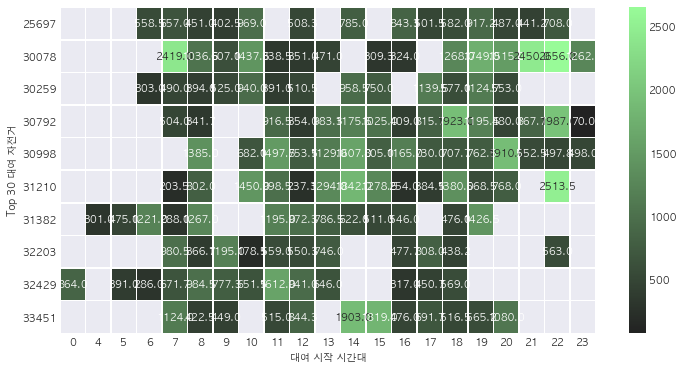

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f',
           cmap=pal) # 소수점 자리 처리
plt.ylabel('Top 30 대여 자전거')
plt.xlabel('대여 시작 시간대')
plt.show()

**해석 보태기**
>